In [1]:
import mlflow
import pandas as pd

In [2]:
mlflow.set_tracking_uri("file:./mlruns")
client = mlflow.client.MlflowClient()

/home/agudeloacosta/miniconda3/envs/winn_experiments/lib/python3.10/site-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


In [3]:
run_dico = client.get_run("514b8c6b327947aeab700b1e49de1ed2").to_dictionary()

In [4]:
client.get_run("514b8c6b327947aeab700b1e49de1ed2").to_dictionary()

{'info': {'artifact_uri': 'file:///home/agudeloacosta/HOMEdev/pg-sequence_learning_refactoring/mlruns/944865415669408417/514b8c6b327947aeab700b1e49de1ed2/artifacts',
  'end_time': None,
  'experiment_id': '944865415669408417',
  'lifecycle_stage': 'active',
  'run_id': '514b8c6b327947aeab700b1e49de1ed2',
  'run_name': 'enthused-snake-351',
  'start_time': 1766011456844,
  'status': 'RUNNING',
  'user_id': 'agudeloacosta'},
 'data': {'metrics': {'Eval/BiomassLoss': 3.252873286329712,
   'Eval/MAE': 906.0581634044647,
   'Eval/DD_Loss': 892.33749127388,
   'Eval/MonotonicityLoss': 0.9218696325551718,
   'Eval/AssimilationLoss': 10.681561648049167,
   'Eval/DryMatterIncreaseLoss': 45.20192642138729,
   'Loss_Coefficients/delta': 0.0,
   'Loss_Coefficients/gamma': 0.1,
   'Loss_Coefficients/alpha': 0.8,
   'Loss_Coefficients/beta': 0.1,
   'Train/TF_ratio': 0.0,
   'Train/BiomassLoss': 24.52290585495719,
   'Train/LR': 7.600257828088285e-05,
   'Train/DD_Loss': 73.17574310302734,
   'Train

In [5]:
run_dico

{'info': {'artifact_uri': 'file:///home/agudeloacosta/HOMEdev/pg-sequence_learning_refactoring/mlruns/944865415669408417/514b8c6b327947aeab700b1e49de1ed2/artifacts',
  'end_time': None,
  'experiment_id': '944865415669408417',
  'lifecycle_stage': 'active',
  'run_id': '514b8c6b327947aeab700b1e49de1ed2',
  'run_name': 'enthused-snake-351',
  'start_time': 1766011456844,
  'status': 'RUNNING',
  'user_id': 'agudeloacosta'},
 'data': {'metrics': {'Eval/BiomassLoss': 3.252873286329712,
   'Eval/MAE': 906.0581634044647,
   'Eval/DD_Loss': 892.33749127388,
   'Eval/MonotonicityLoss': 0.9218696325551718,
   'Eval/AssimilationLoss': 10.681561648049167,
   'Eval/DryMatterIncreaseLoss': 45.20192642138729,
   'Loss_Coefficients/delta': 0.0,
   'Loss_Coefficients/gamma': 0.1,
   'Loss_Coefficients/alpha': 0.8,
   'Loss_Coefficients/beta': 0.1,
   'Train/TF_ratio': 0.0,
   'Train/BiomassLoss': 24.52290585495719,
   'Train/LR': 7.600257828088285e-05,
   'Train/DD_Loss': 73.17574310302734,
   'Train

In [6]:
run_dico["data"]["metrics"].keys()

dict_keys(['Eval/BiomassLoss', 'Eval/MAE', 'Eval/DD_Loss', 'Eval/MonotonicityLoss', 'Eval/AssimilationLoss', 'Eval/DryMatterIncreaseLoss', 'Loss_Coefficients/delta', 'Loss_Coefficients/gamma', 'Loss_Coefficients/alpha', 'Loss_Coefficients/beta', 'Train/TF_ratio', 'Train/BiomassLoss', 'Train/LR', 'Train/DD_Loss', 'Train/Loss', 'Train/AssimilationLoss'])

In [7]:
metrics = client.get_metric_history("34ba19f8e2fa41f9a1db6117eee52947", 'Eval/BiomassLoss')
metrics[0].to_dictionary()

{'key': 'Eval/BiomassLoss',
 'value': 260.0479117558973,
 'timestamp': 1763985456364,
 'step': 0,
 'model_id': None,
 'dataset_name': None,
 'dataset_digest': None,
 'run_id': '34ba19f8e2fa41f9a1db6117eee52947'}

In [6]:
metrics_dicts = [m.to_dictionary() for m in metrics]

In [7]:
df = pd.DataFrame(metrics_dicts)

In [8]:
df.head(3)

,key,value,timestamp,step,model_id,dataset_name,dataset_digest,run_id
0,Eval/BiomassLoss,260.047912,1763985456364,0,None,None,None,34ba19f8e2fa41f9a1db6117eee52947
1,Eval/BiomassLoss,269.715193,1763985684747,1,None,None,None,34ba19f8e2fa41f9a1db6117eee52947
2,Eval/BiomassLoss,218.749285,1763985913963,2,None,None,None,34ba19f8e2fa41f9a1db6117eee52947


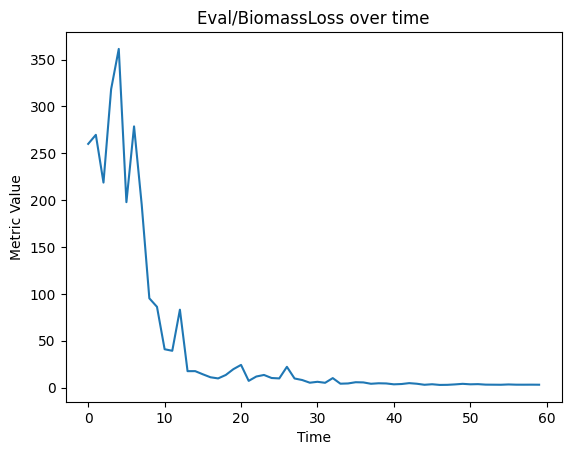

In [9]:
import matplotlib.pyplot as plt

df['value'].plot(title="Eval/BiomassLoss over time", xlabel="Time", ylabel="Metric Value")
plt.show()

# Importing a trained model from **mlruns**

In [10]:
import os
import pickle
import pyarrow.parquet as pq
import torch
from omegaconf import OmegaConf
from datasets.dataOps import create_datasets, create_dataloaders
from hydra.utils import instantiate

In [11]:
with open("data/cat_dicos.pkl", "rb") as f:
    cat_dicos = pickle.load(f)
cat_dicos
# The 29 are the species :D

{'farmid': {'24126346-6d50-4242-81fe-98b5272216c6': 0,
  '056bd2c2-d593-4a1a-82b9-6a50d1c6fe45': 1,
  '171d4455-266a-4c74-a39e-ffaf588983b0': 2,
  '044793e5-809e-403b-b4c7-394c2468256f': 3,
  '2d905613-bb71-4f6d-a97f-259e1e6f27b8': 4,
  '166ec5fc-b59a-4277-a86a-252b04cb2b14': 5,
  '2ba09147-938e-42b1-8d38-82e2d8fb5c72': 6,
  '94dab168-d855-4a9d-8732-07ea7ea79867': 7,
  '8ec5a5ef-b070-4c36-8d25-07065ee21d60': 8,
  'e85c3e66-c7ba-469d-bcc6-284e8627ecbe': 9,
  '7ff3965b-d298-47af-8df8-a0bc4228acbf': 10,
  '8cd7e689-2f72-4df4-86d2-5116cda969bd': 11,
  'd65425a3-e732-4e51-a2e9-676d910e970b': 12,
  '8df88b30-48d2-43b7-974a-0e5bc700c074': 13,
  'e5b1605e-d6c4-4596-9a29-03fd4e0a2376': 14,
  'e6d333c4-5a58-43ab-8d8b-6a2292ea2f40': 15,
  '2695d830-86a1-4a73-94cf-ecfba38f96a3': 16,
  'f054e39d-e4f8-4941-80b5-2a47e5b6102e': 17,
  '922ebe81-1c82-4bb0-bfeb-407d5c1f8a22': 18,
  '63b07362-5052-4cac-900e-c358c5a85c57': 19,
  '00136d6a-4019-4192-b7e4-3e3c8bf38601': 20,
  '4b91f645-0a62-41b7-aa0c-d7afeb6

In [14]:
dico = client.get_run("2adb0e89ef1141f79ab120423ac1adf1").to_dictionary()

In [13]:
os.listdir(dico["info"]["artifact_uri"].removeprefix("file://"))

FileNotFoundError: [Errno 2] No such file or directory: '/home/agudeloacosta/HOMEdev/pg-sequence_learning_refactoring/mlruns/603006285905092538/2adb0e89ef1141f79ab120423ac1adf1/artifacts'

In [56]:
cfg = OmegaConf.load(os.path.join(dico["info"]["artifact_uri"].removeprefix("file://"), "config_exp.yaml"))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
torch.manual_seed(42)

data = {}
for array in ["static_data", "before_ts", "after_ts", "target_ts", "mask_target", "cat_dicos"]:
    with open(f"{cfg.raw_data_folder + array}.pkl", "rb") as f:
        data[array] = pickle.load(f)
table = pq.read_table(cfg.raw_data_folder + cfg.info_ts_file)
ids = table.to_pandas().index.to_list()
list_unic_cat = [len(dico.keys()) for dico in data["cat_dicos"].values()]

train_dataset, val_dataset, test_dataset = create_datasets(ids=ids,
                                                            static_data=data["static_data"],
                                                            before_ts=data["before_ts"],
                                                            after_ts=data["after_ts"],
                                                            target_ts=data["target_ts"],
                                                            mask_target=data["mask_target"],
                                                            train_size=cfg.training.train_size,
                                                            val_size=cfg.training.val_size,
                                                            raw_data_folder=cfg.raw_data_folder,
                                                            means_and_stds_path=cfg.means_and_stds_path,
                                                        )

train_loader, val_loader, _ = create_dataloaders(train_dataset,
                                                            val_dataset,
                                                            test_dataset,
                                                            batch_size=cfg.training.batch_size)

encoder = instantiate(cfg.model.encoder,
                        list_unic_cat=list_unic_cat)
decoder = instantiate(cfg.model.decoder)

Using device: cuda

          Train_DS = 120051 obs
          Val_DS = 40017 obs
          Test_DS = 40018 obs
          


In [103]:
# show Parameters
display(sum(p.numel() for p in decoder.parameters() if p.requires_grad))
display(sum(p.numel() for p in decoder.parameters()))

display(sum(p.numel() for p in encoder.parameters() if p.requires_grad))
display(sum(p.numel() for p in encoder.parameters()))

0

5903243

4350

10659690

In [97]:
encoder.parameters

<bound method Module.parameters of Encoder(
  (static_encoder): StaticEncoder(
    (embeddings): ModuleList(
      (0): Embedding(2905, 150)
      (1): Embedding(2886, 150)
      (2): Embedding(52147, 150)
      (3): Embedding(29, 150)
    )
    (mlp_after_embedding): Sequential(
      (0): Linear(in_features=600, out_features=420, bias=True)
      (1): ReLU()
      (2): Linear(in_features=420, out_features=256, bias=True)
    )
    (fc): Sequential(
      (0): Linear(in_features=5, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): ReLU()
      (4): Linear(in_features=256, out_features=256, bias=True)
    )
    (last_ffnn): Linear(in_features=512, out_features=256, bias=True)
  )
  (dynamic_encoder): DynamicEncoder(
    (gru): GRU(7, 384, num_layers=2, batch_first=True)
    (mlp_to_first_decoder_input): Sequential(
      (0): Linear(in_features=7, out_features=11, bias=True)
      (1): ReLU()
      (2): Linear(in_f

In [100]:
for param in encoder.parameters():
    param.requires_grad = False
for param in decoder.parameters():
    param.requires_grad = False
encoder.static_encoder.embeddings[3].weight.requires_grad = True